# Importing the required libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv('data.txt', sep=', ', header=None, names=columns)

# Drop the fnlwgt column
data = data.drop('fnlwgt', axis=1)

C:\Users\Youssef\AppData\Local\Temp/ipykernel_2168/2984815827.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('data.txt', sep=', ', header=None, names=columns)


In [4]:
# I want to count the number of ? characters in the each column
question_marks = data.isin(['?']).sum()

# Replace the ? characters with NaN
data = data.replace('?', np.nan)
data.dropna(inplace=True)

# Planning for Visualizations
## Feature Selection
We need to choose the number of features that we are continuing with (Need to be at least 8 variables)
1. Age
2. Workclass
3. Education
4. Maritial Status __DONE__
5. Sex
6. Relationship Status __DONE__
7. Capital Loss __DONE__
8. Capital Gain __DONE__

## User Stories
Define the 5 user stories that I want to use for the project. (At least, 3 of them must be mutli-variate)
1. Grouped Bar Chart &#8594; (Capital Gain & Capital Loss and Income) __DONE__
2. Heat Map Plot &#8594; (Relationship and Martial Status and Income) __DONE__
3. Box and Whisker plot &#8594; (Age and Income)
4. Pie Chart &#8594; (... and Income)
5. Mosaic Plot &#8594; (Sex and Race VS Income possibly)

Parallel Coordinates Plot &#8594; (Education and Income)

* Heat Map &#8594; (Native Country and Income)

In [5]:
# Split the data into the 2 dataframes one for the incomes less than and equal 50k and the other for the incomes greater than 50k
data_less_50k = data[data['income'] == '<=50K']
data_greater_50k = data[data['income'] == '>50K']

### Grouped Bar Chart (Capital Gain & Capital Loss VS. Income)

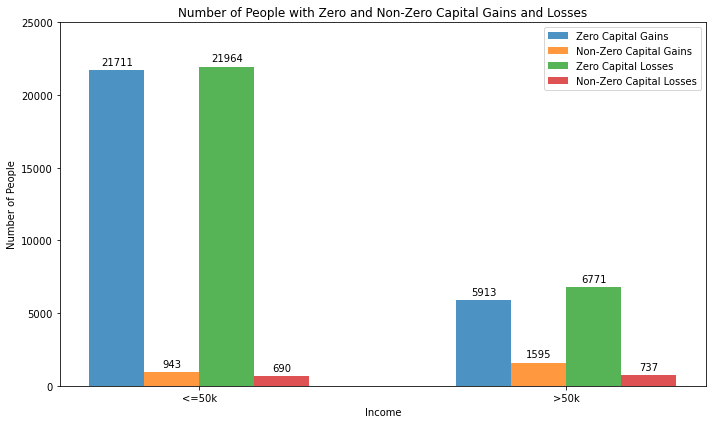

In [25]:
categories = ('<=50k', '>50k')
bars = {'Zero Capital Gains': [0, 0], 'Non-Zero Capital Gains': [0, 0], 
        'Zero Capital Losses': [0, 0], 'Non-Zero Capital Losses': [0, 0]}

# Count the number of zero and non-zero capital gains for the incomes less than and equal 50k
bars['Zero Capital Gains'][0] = data_less_50k[data_less_50k['capital-gain'] == 0].shape[0]
bars['Non-Zero Capital Gains'][0] = data_less_50k[data_less_50k['capital-gain'] != 0].shape[0]
bars['Zero Capital Losses'][0] = data_less_50k[data_less_50k['capital-loss'] == 0].shape[0]
bars['Non-Zero Capital Losses'][0] = data_less_50k[data_less_50k['capital-loss'] != 0].shape[0]

# Count the number of zero and non-zero capital gains for the incomes greater than 50k
bars['Zero Capital Gains'][1] = data_greater_50k[data_greater_50k['capital-gain'] == 0].shape[0]
bars['Non-Zero Capital Gains'][1] = data_greater_50k[data_greater_50k['capital-gain'] != 0].shape[0]
bars['Zero Capital Losses'][1] = data_greater_50k[data_greater_50k['capital-loss'] == 0].shape[0]
bars['Non-Zero Capital Losses'][1] = data_greater_50k[data_greater_50k['capital-loss'] != 0].shape[0]

fig, ax = plt.subplots(figsize=(10, 6))  # Increased figure size for clarity
index = np.arange(len(categories))
bar_width = 0.15  # Adjusted bar width for more space
opacity = 0.8

# Calculate positions for each group to ensure they do not overlap
positions = [index + bar_width * i for i in range(len(bars))]

# Plotting
bars_plotted = []  # To store the bar containers for adding labels
for i, (label, counts) in enumerate(bars.items()):
    bar_container = ax.bar(positions[i], counts, bar_width, alpha=opacity, label=label)
    bars_plotted.append(bar_container)

plt.xlabel('Income')
plt.ylabel('Number of People')
plt.title('Number of People with Zero and Non-Zero Capital Gains and Losses')
plt.xticks(index + bar_width * len(bars) / 2 - bar_width / 2, categories)
plt.legend()
ax.set_ylim(0, 25000)  # Adjust as necessary

# Function to add numbers on top of each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply the function to each bar container
for bars in bars_plotted:
    autolabel(bars)

plt.tight_layout()
plt.show()

### Heat Map Plot &#8594; (Relationship and Martial Status and Income)

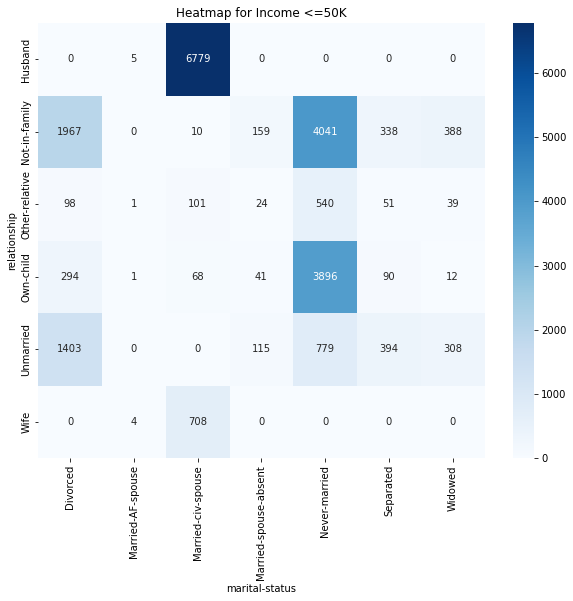

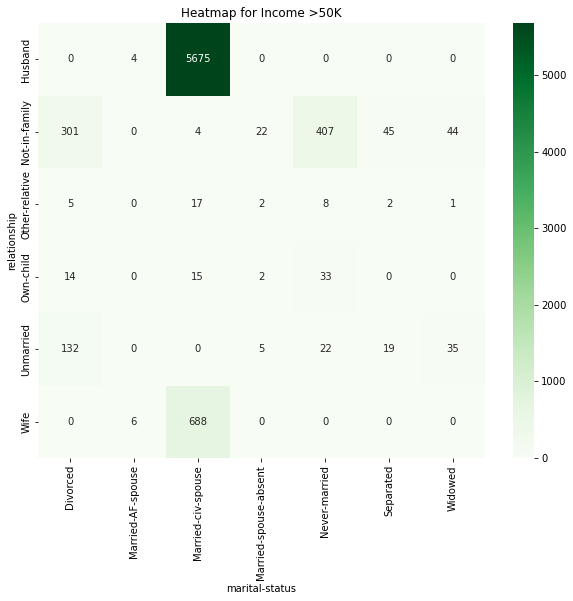

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Copy the DataFrame
df = data.copy()
df['income'] = df['income'].apply(lambda x: 0 if x == "<=50K" else 1)

# Filter the DataFrame for income status 0 and 1
df_income_0 = df[df['income'] == 0]
df_income_1 = df[df['income'] == 1]

# Pivot the data for heatmap for income status 0
pivot_0 = df_income_0.pivot_table(index='relationship', columns='marital-status', values='income', aggfunc='count', fill_value=0)

# Pivot the data for heatmap for income status 1
pivot_1 = df_income_1.pivot_table(index='relationship', columns='marital-status', values='income', aggfunc='count', fill_value=0)

# Check if pivot_0 is empty; if it is, don't attempt to plot it
if not pivot_0.empty:
    # Heatmap for income status 0
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_0, annot=True, fmt="d", cmap='Blues')
    plt.title('Heatmap for Income <=50K')
    plt.show()

# Check if pivot_1 is empty; if it is, don't attempt to plot it
if not pivot_1.empty:
    # Heatmap for income status 1
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_1, annot=True, fmt="d", cmap='Greens')
    plt.title('Heatmap for Income >50K')
    plt.show()

### Useloss plots & Reason

#### Heat Map (Native Country & Income >50k)


I can mention:
1. Being able to look at different variables and what they look in different charts
2. Mention the issue of finding good visualizations when it comes to constinous datatypes
3. Mention being possibly deceived by having outliers in the data

Mention that the USA has most points by a long shot, so it doesn't really tell a story.

In [7]:
# These are the countries that we are keeping from the GeoDataFrame
countries_to_keep = [
    'United States of America', 'Cambodia', 'Puerto Rico', 'Canada', 'Germany',
    'India', 'Japan', 'Greece', 'China', 'Cuba', 'Iran', 'Honduras',
    'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico',
    'Portugal', 'Ireland', 'France', 'Dominican Republic', 'Laos',
    'Ecuador', 'Taiwan', 'Haiti', 'Colombia', 'Hungary', 'Guatemala',
    'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El Salvador',
    'Trinidad and Tobago', 'Peru', 'Hong Kong']

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the GeoDataFrame to keep only specified countries
filtered_world = world[world['name'].isin(countries_to_keep)]

C:\Users\Youssef\AppData\Local\Temp/ipykernel_2168/3117102530.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [8]:
# Take the greater than 50k data and group it by the native country and count the number of people in each country
greater_50k_grouped = data_greater_50k.groupby('native-country').size().reset_index(name='counts')

# Rename the columns according to the GeoDataFrame

# Rename United-States to United States
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'United-States', 'native-country'] = 'United States of America'
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'Dominican-Republic', 'native-country'] = 'Dominican Rep.'
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'Hong', 'native-country'] = 'Hong Kong'
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'Trinadad&Tobago', 'native-country'] = 'Trinidad and Tobago'
# greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'Holand-Netherlands', 'native-country'] = 'Netherlands'
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'El-Salvador', 'native-country'] = 'El Salvador'
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'Puerto-Rico', 'native-country'] = 'Puerto Rico'
greater_50k_grouped.loc[greater_50k_grouped['native-country'] == 'Columbia', 'native-country'] = 'Colombia'

# Drop the rows with the countries that are not in not in the GeoDataFrame --> South, Outlying-US(Guam-USVI-etc), England
greater_50k_grouped = greater_50k_grouped[greater_50k_grouped['native-country'] != 'South']
greater_50k_grouped = greater_50k_grouped[greater_50k_grouped['native-country'] != 'Outlying-US(Guam-USVI-etc)']
greater_50k_grouped = greater_50k_grouped[greater_50k_grouped['native-country'] != 'England']

In [9]:
# Merging the datasets
filtered_world = filtered_world.rename(columns={'name': 'native-country'})  # Ensuring column names match for the merge
merged = filtered_world.merge(greater_50k_grouped, on='native-country', how='left')

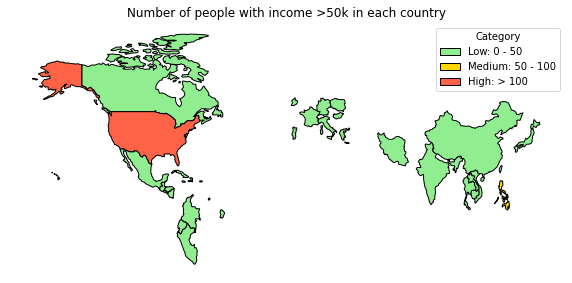

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Example of categorizing into 3 bins with labels
bin_edges = [0, 50, 100, max(merged['counts'].max(), 200)]  # Adjust the bin edges as needed
bin_labels = ['Low', 'Medium', 'High']
merged['category'] = pd.cut(merged['counts'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Define colors for each category
category_colors = {
    'Low': 'lightgreen',
    'Medium': 'gold',
    'High': 'tomato'
}

# Plotting with a larger figure size, black borders, and a custom legend
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

legend_handles = []  # List to store legend handles

for i, (category, color) in enumerate(category_colors.items()):
    subset = merged[merged['category'] == category]
    
    # Create a custom label with category name and bin range
    if i < len(bin_labels) - 1:
        custom_label = f"{category}: {bin_edges[i]} - {bin_edges[i+1]}"
    else:
        # Handle the last category differently if necessary
        custom_label = f"{category}: > {bin_edges[i]}"
    
    # Plot each category
    subset.plot(ax=ax, label=custom_label, color=color, edgecolor='black')
    
    # Create a legend handle for the category
    legend_handles.append(Patch(facecolor=color, edgecolor='black', label=custom_label))

# Create custom legend
plt.legend(handles=legend_handles, title="Category")
plt.title('Number of people with income >50k in each country')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Number of people with income >50k in each country')

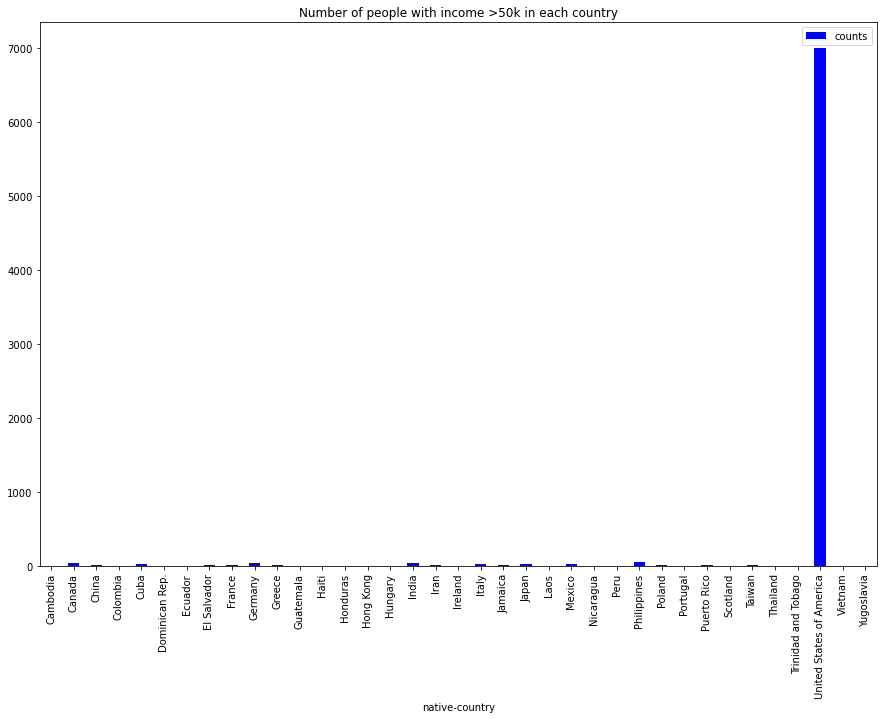

In [11]:
# Give me a bar plot of the number of people in each country with income greater than 50k without using the GeoDataFrame
greater_50k_grouped.plot.bar(x='native-country', y='counts', color='blue', figsize=(15, 10))
plt.title('Number of people with income >50k in each country')

### Heat Map (Native Country vs Income <=50k)

In [12]:
# These are the countries that we are keeping from the GeoDataFrame
countries_to_keep = [
    'United States of America', 'Cambodia', 'Puerto Rico', 'Canada', 'Germany',
    'India', 'Japan', 'Greece', 'China', 'Cuba', 'Iran', 'Honduras',
    'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico',
    'Portugal', 'Ireland', 'France', 'Dominican Republic', 'Laos',
    'Ecuador', 'Taiwan', 'Haiti', 'Colombia', 'Hungary', 'Guatemala',
    'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El Salvador',
    'Trinidad and Tobago', 'Peru', 'Hong Kong', 'Netherlands']

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
filtered_world = world[world['name'].isin(countries_to_keep)]

C:\Users\Youssef\AppData\Local\Temp/ipykernel_2168/1241992861.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [13]:
# Take the greater than 50k data and group it by the native country and count the number of people in each country
less_50k_grouped = data_less_50k.groupby('native-country').size().reset_index(name='counts')

In [14]:
# Rename the columns according to the GeoDataFrame

# Rename United-States to United States
less_50k_grouped.loc[less_50k_grouped['native-country'] == 'United-States', 'native-country'] = 'United States of America'
less_50k_grouped.loc[less_50k_grouped['native-country'] == 'Dominican-Republic', 'native-country'] = 'Dominican Rep.'
less_50k_grouped.loc[less_50k_grouped['native-country'] == 'Hong', 'native-country'] = 'Hong Kong'
less_50k_grouped.loc[less_50k_grouped['native-country'] == 'Trinadad&Tobago', 'native-country'] = 'Trinidad and Tobago'
less_50k_grouped.loc[less_50k_grouped['native-country'] == 'Holand-Netherlands', 'native-country'] = 'Netherlands'
less_50k_grouped.loc[less_50k_grouped['native-country'] == 'El-Salvador', 'native-country'] = 'El Salvador'
less_50k_grouped.loc[less_50k_grouped['native-country'] == 'Puerto-Rico', 'native-country'] = 'Puerto Rico'
less_50k_grouped.loc[less_50k_grouped['native-country'] == 'Columbia', 'native-country'] = 'Colombia'


# Drop the rows with the countries that are not in not in the GeoDataFrame --> South, Outlying-US(Guam-USVI-etc), England
less_50k_grouped = less_50k_grouped[less_50k_grouped['native-country'] != 'South']
less_50k_grouped = less_50k_grouped[less_50k_grouped['native-country'] != 'Outlying-US(Guam-USVI-etc)']
less_50k_grouped = less_50k_grouped[less_50k_grouped['native-country'] != 'England']

In [15]:
# Merging the datasets
filtered_world = filtered_world.rename(columns={'name': 'native-country'})  # Ensuring column names match for the merge
less_merged = filtered_world.merge(less_50k_grouped, on='native-country', how='left')

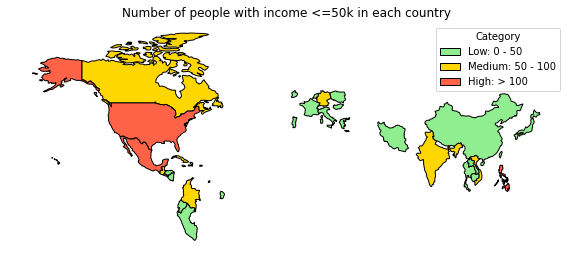

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Example of categorizing into 3 bins with labels
bin_edges = [0, 50, 100, max(less_merged['counts'].max(), 200)]  # Adjust the bin edges as needed
bin_labels = ['Low', 'Medium', 'High']
less_merged['category'] = pd.cut(less_merged['counts'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Define colors for each category
category_colors = {
    'Low': 'lightgreen',
    'Medium': 'gold',
    'High': 'tomato'
}

# Plotting with a larger figure size, black borders, and a custom legend
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

legend_handles = []  # List to store legend handles

for i, (category, color) in enumerate(category_colors.items()):
    subset = less_merged[less_merged['category'] == category]
    
    # Create a custom label with category name and bin range
    if i < len(bin_labels) - 1:
        custom_label = f"{category}: {bin_edges[i]} - {bin_edges[i+1]}"
    else:
        # Handle the last category differently if necessary
        custom_label = f"{category}: > {bin_edges[i]}"
    
    # Plot each category
    subset.plot(ax=ax, label=custom_label, color=color, edgecolor='black')
    
    # Create a legend handle for the category
    legend_handles.append(Patch(facecolor=color, edgecolor='black', label=custom_label))

# Create custom legend
plt.legend(handles=legend_handles, title="Category")
plt.title('Number of people with income <=50k in each country')
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='native-country'>

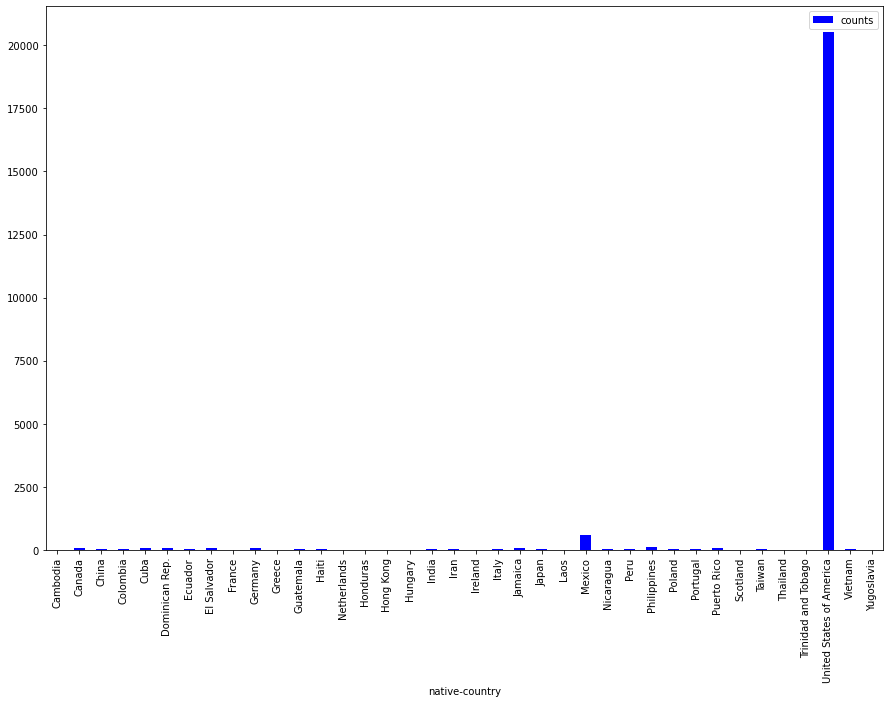

In [17]:
# Give me a bar plot of the number of people in each country with income greater than 50k without using the GeoDataFrame
less_50k_grouped.plot.bar(x='native-country', y='counts', color='blue', figsize=(15, 10))

### Stacked Bar Chart (Native Country VS Income)

In [18]:
# Make a set of the countries in the data
countries = set(data['native-country'])

# Make a dictionary of the countries and and their values would be an array [less_50k, greater_50k] which would be the number of people in each income category
country_income = {}
for country in countries:
    country_income[country] = [data_less_50k[data_less_50k['native-country'] == country].shape[0], data_greater_50k[data_greater_50k['native-country'] == country].shape[0]]

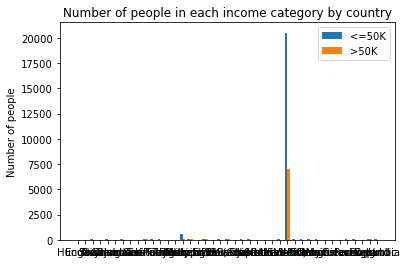

In [19]:
x = np.arange(len(countries))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [country[0] for country in country_income.values()], width, label='<=50K')
rects2 = ax.bar(x + width/2, [country[1] for country in country_income.values()], width, label='>50K')

ax.set_ylabel('Number of people')
ax.set_title('Number of people in each income category by country')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()

plt.show()